<a href="https://colab.research.google.com/github/roshanappa/Anomaly-Detection-Techniques-/blob/master/Electric%20Power%20Consumption%20Forecasting/Electricity_power_Consumption_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing The Necessary Libraries

In [53]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import seaborn as sns

In [54]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split

In [55]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,LSTM,Dropout
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [56]:
mpl.rcParams['figure.figsize']=(10,9)
mpl.rcParams['axes.grid']=False

In [57]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00235/household_power_consumption.zip',sep=';')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Preprocessing Of The Data.

In [58]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [59]:
df.tail()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
2075254,26/11/2010,20:58:00,0.946,0,240.43,4,0,0,0.0
2075255,26/11/2010,20:59:00,0.944,0,240,4,0,0,0.0
2075256,26/11/2010,21:00:00,0.938,0,239.82,3.8,0,0,0.0
2075257,26/11/2010,21:01:00,0.934,0,239.7,3.8,0,0,0.0
2075258,26/11/2010,21:02:00,0.932,0,239.55,3.8,0,0,0.0


In [60]:
df.dtypes

Date                      object
Time                      object
Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object

In [61]:
df.isnull().sum()

Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [62]:
df['DateTime'] = df['Date'].str.cat(df['Time'],sep=' ')
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,DateTime
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0,16/12/2006 17:24:00
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0,16/12/2006 17:25:00
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0,16/12/2006 17:26:00
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0,16/12/2006 17:27:00
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0,16/12/2006 17:28:00


In [63]:
df.drop(columns=['Date','Time'],inplace=True)

In [64]:
df.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'DateTime'],
      dtype='object')

In [65]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,DateTime
0,4.216,0.418,234.840,18.400,0.000,1.000,17.0,16/12/2006 17:24:00
1,5.360,0.436,233.630,23.000,0.000,1.000,16.0,16/12/2006 17:25:00
2,5.374,0.498,233.290,23.000,0.000,2.000,17.0,16/12/2006 17:26:00
3,5.388,0.502,233.740,23.000,0.000,1.000,17.0,16/12/2006 17:27:00
4,3.666,0.528,235.680,15.800,0.000,1.000,17.0,16/12/2006 17:28:00


In [66]:
df.tail()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,DateTime
2075254,0.946,0,240.43,4,0,0,0.0,26/11/2010 20:58:00
2075255,0.944,0,240,4,0,0,0.0,26/11/2010 20:59:00
2075256,0.938,0,239.82,3.8,0,0,0.0,26/11/2010 21:00:00
2075257,0.934,0,239.7,3.8,0,0,0.0,26/11/2010 21:01:00
2075258,0.932,0,239.55,3.8,0,0,0.0,26/11/2010 21:02:00


We save it as csv file first.

In [67]:
df.to_csv('Clean_data.csv')

In [86]:
data = pd.read_csv('Clean_data.csv',index_col='DateTime',parse_dates=True,low_memory=False,)

In [88]:
data.head()

,Unnamed: 0,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
DateTime,,,,,,,,
2006-12-16 17:24:00,0,4.216,0.418,234.840,18.400,0.000,1.000,17.0
2006-12-16 17:25:00,1,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2006-12-16 17:26:00,2,5.374,0.498,233.290,23.000,0.000,2.000,17.0
2006-12-16 17:27:00,3,5.388,0.502,233.740,23.000,0.000,1.000,17.0
2006-12-16 17:28:00,4,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [89]:
del data['Unnamed: 0']

In [90]:
data.replace('?',np.nan,inplace=True)

In [91]:
data = data.astype('float')

In [92]:
data.dtypes

Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object

In [93]:
data = data.fillna(method='ffill')

In [94]:
data.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [95]:
data.tail()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
DateTime,,,,,,,
2010-11-26 20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2010-11-26 20:59:00,0.944,0.0,240.00,4.0,0.0,0.0,0.0
2010-11-26 21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2010-11-26 21:01:00,0.934,0.0,239.70,3.8,0.0,0.0,0.0
2010-11-26 21:02:00,0.932,0.0,239.55,3.8,0.0,0.0,0.0


## Dataset Preparation.

In [96]:
datasets = data.resample('H').sum()

In [97]:
datasets.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
DateTime,,,,,,,
2006-12-16 17:00:00,152.024,8.244,8447.18,651.6,0.0,19.0,607.0
2006-12-16 18:00:00,217.932,4.802,14074.81,936.0,0.0,403.0,1012.0
2006-12-16 19:00:00,204.014,5.114,13993.95,870.2,0.0,86.0,1001.0
2006-12-16 20:00:00,196.114,4.506,14044.29,835.0,0.0,0.0,1007.0
2006-12-16 21:00:00,183.388,4.600,14229.52,782.8,0.0,25.0,1033.0


In [98]:
datasets.tail()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
DateTime,,,,,,,
2010-12-11 19:00:00,143.518,6.828,13931.03,620.2,21.0,0.0,788.0
2010-12-11 20:00:00,105.200,5.090,14040.45,450.0,483.0,66.0,604.0
2010-12-11 21:00:00,66.894,5.148,14192.62,284.8,513.0,27.0,0.0
2010-12-11 22:00:00,19.232,4.574,14408.44,82.4,0.0,0.0,0.0
2010-12-11 23:00:00,38.392,2.986,14602.29,156.4,0.0,0.0,0.0


In [99]:
datasets.shape

(34951, 7)

AS we we interseted in the Global_active_power

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f89ad48f470>,
      dtype=object)

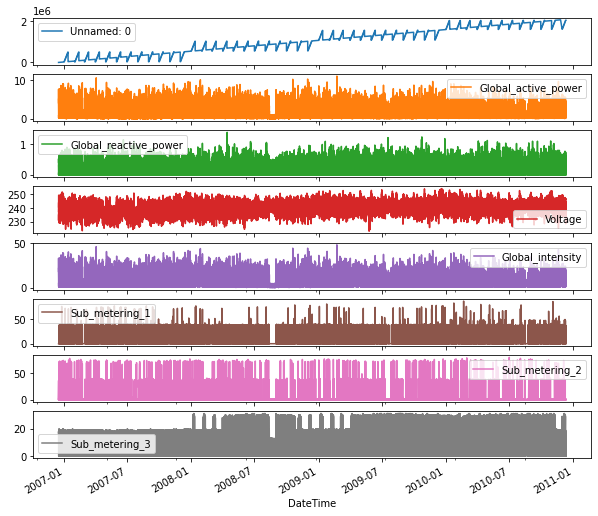

In [80]:
data.plot(subplots=True)

In [100]:
datasets.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 34951 entries, 2006-12-16 17:00:00 to 2010-12-11 23:00:00
Freq: H
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Global_active_power    34951 non-null  float64
 1   Global_reactive_power  34951 non-null  float64
 2   Voltage                34951 non-null  float64
 3   Global_intensity       34951 non-null  float64
 4   Sub_metering_1         34951 non-null  float64
 5   Sub_metering_2         34951 non-null  float64
 6   Sub_metering_3         34951 non-null  float64
dtypes: float64(7)
memory usage: 2.1 MB


In [101]:
round(datasets.describe(),1)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,34951.0,34951.0,34951.0,34951.0,34951.0,34951.0,34951.0
mean,64.5,7.3,14300.3,273.4,66.0,76.5,381.0
std,53.8,4.1,1476.1,225.3,210.1,248.9,440.1
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,20.3,4.6,14347.2,89.4,0.0,0.0,39.0
50%,46.9,6.4,14456.9,200.4,0.0,19.0,98.0
75%,94.1,8.9,14560.4,393.0,0.0,39.0,833.0
max,393.6,46.5,15114.1,1703.0,2902.0,2786.0,1293.0


If we see in the Global power consumption the outliers are avalible.

In [102]:
datasets.query('Global_active_power > 200')

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
DateTime,,,,,,,
2006-12-16 18:00:00,217.932,4.802,14074.81,936.0,0.0,403.0,1012.0
2006-12-16 19:00:00,204.014,5.114,13993.95,870.2,0.0,86.0,1001.0
2006-12-17 01:00:00,200.964,8.216,14426.90,854.8,0.0,1514.0,0.0
2006-12-17 10:00:00,217.734,11.676,14126.46,932.0,533.0,1341.0,969.0
2006-12-17 17:00:00,204.406,9.998,14053.79,870.6,0.0,28.0,1009.0
...,...,...,...,...,...,...,...
2010-11-03 21:00:00,236.782,12.386,14303.87,1005.4,1061.0,0.0,1085.0
2010-11-04 20:00:00,228.968,6.492,14269.98,974.8,1716.0,13.0,681.0
2010-11-04 21:00:00,232.988,5.916,14191.49,1002.8,1781.0,0.0,641.0


In [103]:
datasets.query('Global_active_power > 200').shape

(863, 7)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f89a7a526a0>,
      dtype=object)

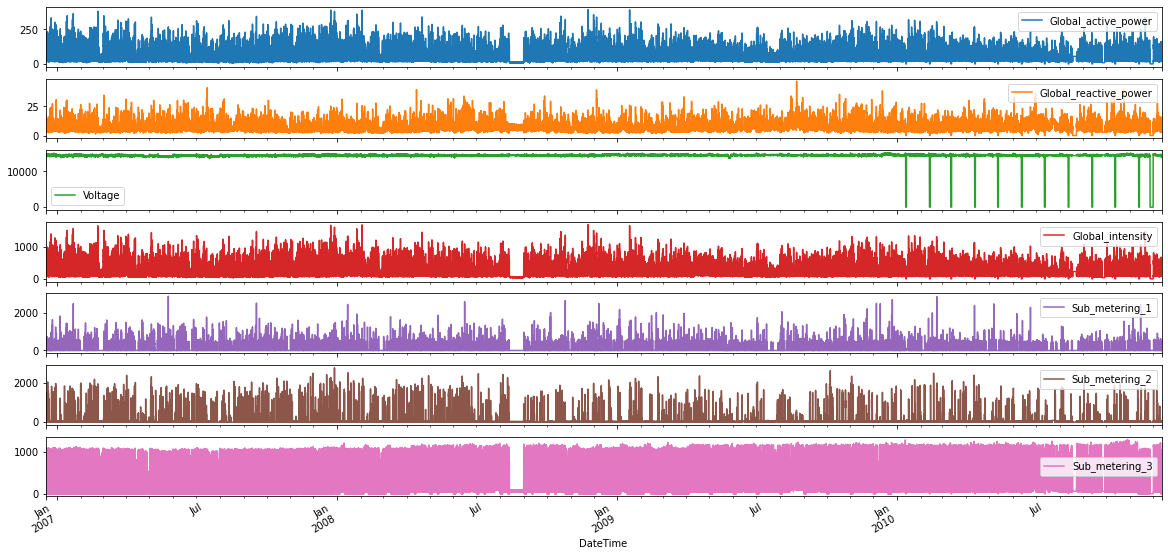

In [104]:
datasets.plot(subplots=True,figsize=(20,10))

## Data Preparation.

In [282]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [308]:
features = datasets
target = dataset['Global_active_power']

In [309]:
X_train,X_test,Y_train,Y_test = train_test_split(features,target,test_size=0.3,random_state=42,shuffle=False)

In [310]:
X_train.shape,X_test.shape

((24465, 7), (10486, 7))

In [311]:
  Y_train.shape,Y_test.shape

((24465,), (10486,))

We have taken the data on hourly basis we are taking length of `one_day=24*1=24`

- windows_length=24
- batch_size=30
- num_features =6

In [312]:
xscaler = MinMaxScaler()
X_train = xscaler.fit_transform(X_train)
X_test = xscaler.fit_transform(X_test)

In [313]:
X_train.shape,X_test.shape

((24465, 7), (10486, 7))

In [314]:
yscaler = MinMaxScaler()
Y_train = yscaler.fit_transform(Y_train.to_numpy().reshape(-1,1))
Y_test  = yscaler.fit_transform(Y_test.to_numpy().reshape(-1,1))

In [315]:
Y_train.shape,Y_test.shape

((24465, 1), (10486, 1))

In [316]:
win_length=24 #This is for day.
batch_size=60
num_features =7

train_generator = TimeseriesGenerator(X_train,Y_train,length=win_length,sampling_rate=1,batch_size=batch_size)
test_generator  = TimeseriesGenerator(X_test,Y_test,length=win_length,sampling_rate=1,batch_size=batch_size)

In [317]:

import keras
model = Sequential()
model.add(keras.layers.LSTM(200,return_sequences=True,input_shape=(win_length,num_features)))
model.add(keras.layers.LeakyReLU(alpha=0.5))
model.add(keras.layers.LSTM(128,return_sequences=True))
model.add(keras.layers.LeakyReLU(alpha=0.5))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.LSTM(128,return_sequences=False))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(1))

In [318]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_19 (LSTM)               (None, 24, 200)           166400    
_________________________________________________________________
leaky_re_lu_10 (LeakyReLU)   (None, 24, 200)           0         
_________________________________________________________________
lstm_20 (LSTM)               (None, 24, 128)           168448    
_________________________________________________________________
leaky_re_lu_11 (LeakyReLU)   (None, 24, 128)           0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 24, 128)           0         
_________________________________________________________________
lstm_21 (LSTM)               (None, 128)               131584    
_________________________________________________________________
dropout_15 (Dropout)         (None, 128)              

In [321]:
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss',patience=1,mode='min')

model.compile(optimizer='adam',loss='mse',metrics=['mae'])

In [322]:
history=model.fit_generator(train_generator,epochs=50,validation_data=test_generator,shuffle=False,callbacks=[early_stopping])

Epoch 1/50
408/408 [==============================] - 94s 230ms/step - loss: 0.0090 - mae: 0.0673 - val_loss: 0.0095 - val_mae: 0.0702
Epoch 2/50
408/408 [==============================] - 97s 237ms/step - loss: 0.0086 - mae: 0.0651 - val_loss: 0.0094 - val_mae: 0.0702
Epoch 3/50
408/408 [==============================] - 96s 236ms/step - loss: 0.0084 - mae: 0.0640 - val_loss: 0.0095 - val_mae: 0.0687


In [323]:
model.evaluate_generator(test_generator,verbose=1)

175/175 [==============================] - 12s 67ms/step - loss: 0.0095 - mae: 0.0687


[0.00953302439302206, 0.06872784346342087]

In [324]:
predictions = model.predict_generator(test_generator)

In [325]:
predictions

array([[0.03379559],
       [0.06134725],
       [0.10010566],
       ...,
       [0.15277934],
       [0.09663937],
       [0.04073189]], dtype=float32)

In [326]:
predicted = predictions.reshape(-1,1)
predicted

array([[0.03379559],
       [0.06134725],
       [0.10010566],
       ...,
       [0.15277934],
       [0.09663937],
       [0.04073189]], dtype=float32)

In [327]:
predictions.shape

(10462, 1)

In [328]:
predicted.shape

(10462, 1)

In [329]:
X_test

array([[0.04889073, 0.08854954, 0.9907689 , ..., 0.        , 0.        ,
        0.        ],
       [0.0518942 , 0.1359742 , 0.98592707, ..., 0.        , 0.01403642,
        0.        ],
       [0.0490566 , 0.0977724 , 0.9763625 , ..., 0.        , 0.00986343,
        0.        ],
       ...,
       [0.19813987, 0.12972483, 0.93903052, ..., 0.17818687, 0.01024279,
        0.        ],
       [0.05696514, 0.11526056, 0.95330989, ..., 0.        , 0.        ,
        0.        ],
       [0.11371701, 0.07524443, 0.96613564, ..., 0.        , 0.        ,
        0.        ]])

In [330]:
X_test[:,1:][win_length:]

array([[0.07942748, 0.97818861, 0.04557713, 0.        , 0.        ,
        0.        ],
       [0.13667977, 0.97440076, 0.05056634, 0.        , 0.01176024,
        0.        ],
       [0.09454692, 0.97518347, 0.04692557, 0.        , 0.00113809,
        0.        ],
       ...,
       [0.12972483, 0.93903052, 0.19201726, 0.17818687, 0.01024279,
        0.        ],
       [0.11526056, 0.95330989, 0.05555556, 0.        , 0.        ,
        0.        ],
       [0.07524443, 0.96613564, 0.10544768, 0.        , 0.        ,
        0.        ]])

In [331]:
X_test.shape

(10486, 7)

In [333]:
df_pred = pd.concat([pd.DataFrame(predicted),pd.DataFrame(X_test[:,1:][win_length:])],axis=1)

In [334]:
df_pred.columns = ['Predicted','Col1','Col2','Col3','Col4','Col5','Col6']

In [336]:
df_pred

,Predicted,Col1,Col2,Col3,Col4,Col5,Col6
0,0.033796,0.079427,0.978189,0.045577,0.000000,0.000000,0.000000
1,0.061347,0.136680,0.974401,0.050566,0.000000,0.011760,0.000000
2,0.100106,0.094547,0.975183,0.046926,0.000000,0.001138,0.000000
3,0.141270,0.080839,0.972018,0.045982,0.000000,0.000000,0.000000
4,0.180392,0.167019,0.967045,0.133495,0.000000,0.011002,0.000000
...,...,...,...,...,...,...,...
10457,0.422202,0.172059,0.921723,0.418150,0.007294,0.000000,0.609435
10458,0.327019,0.128263,0.928962,0.303398,0.167767,0.025038,0.467131
10459,0.152779,0.129725,0.939031,0.192017,0.178187,0.010243,0.000000
10460,0.096639,0.115261,0.953310,0.055556,0.000000,0.000000,0.000000


In [342]:
df_final = datasets[predictions.shape[0]*-1:]

In [343]:
df_final.count()

Global_active_power      10462
Global_reactive_power    10462
Voltage                  10462
Global_intensity         10462
Sub_metering_1           10462
Sub_metering_2           10462
Sub_metering_3           10462
dtype: int64

In [344]:
predicted = yscaler.inverse_transform(df_pred['Predicted'].to_numpy().reshape(-1,1))

In [345]:
df_final['Predicted'] = predicted

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [346]:
df_final[:12]

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Predicted
DateTime,,,,,,,,
2009-10-02 02:00:00,16.174,3.152,14784.46,67.6,0.0,0.0,0.0,11.409728
2009-10-02 03:00:00,18.000,5.424,14727.21,75.0,0.0,31.0,0.0,20.711447
2009-10-02 04:00:00,16.668,3.752,14739.04,69.6,0.0,3.0,0.0,33.796673
2009-10-02 05:00:00,16.362,3.208,14691.19,68.2,0.0,0.0,0.0,47.694279
2009-10-02 06:00:00,45.858,6.628,14616.03,198.0,0.0,29.0,0.0,60.902283
2009-10-02 07:00:00,144.990,4.472,14335.29,604.6,0.0,5.0,926.0,97.031342
2009-10-02 08:00:00,109.040,3.918,14378.31,462.6,0.0,0.0,1058.0,124.313202
2009-10-02 09:00:00,106.738,8.382,14557.24,449.2,0.0,24.0,1083.0,86.123451
2009-10-02 10:00:00,103.398,8.818,14501.54,428.6,0.0,8.0,1075.0,94.712349


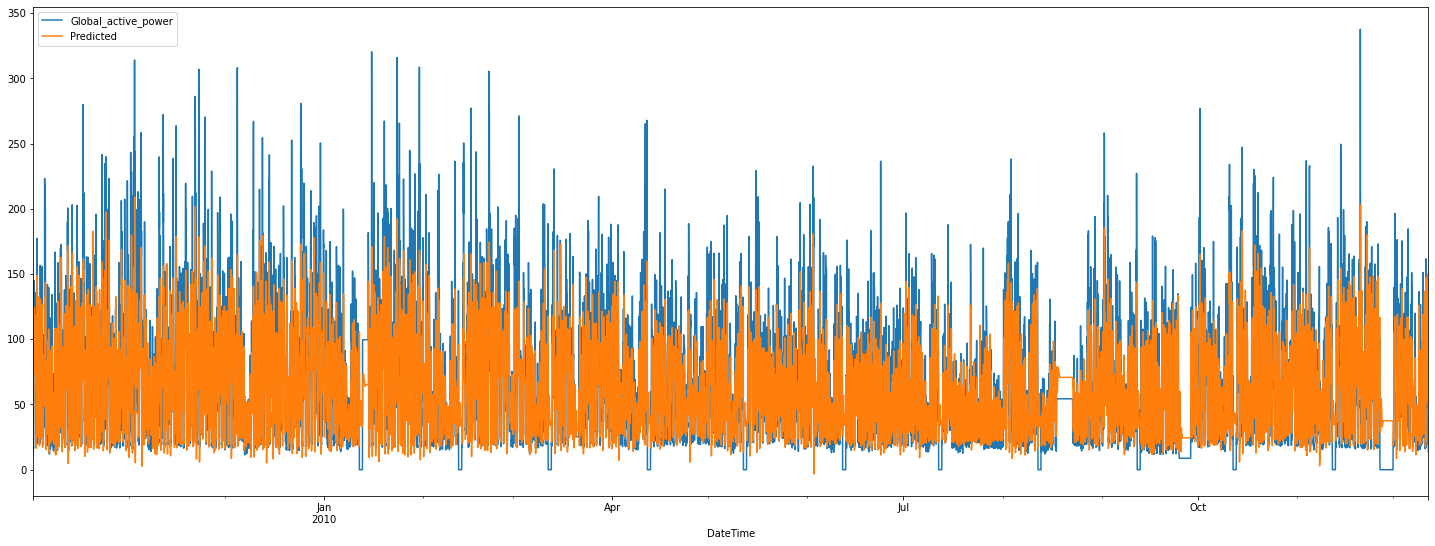

In [347]:
df_final[['Global_active_power','Predicted']].plot(figsize=(25,9))

In [348]:
history.history

{'loss': [0.009017813950777054, 0.008621370419859886, 0.008360536769032478],
 'mae': [0.06727547198534012, 0.0651409700512886, 0.06396457552909851],
 'val_loss': [0.009489242918789387, 0.00942147709429264, 0.00953302439302206],
 'val_mae': [0.07019571214914322, 0.07019902020692825, 0.06872784346342087]}

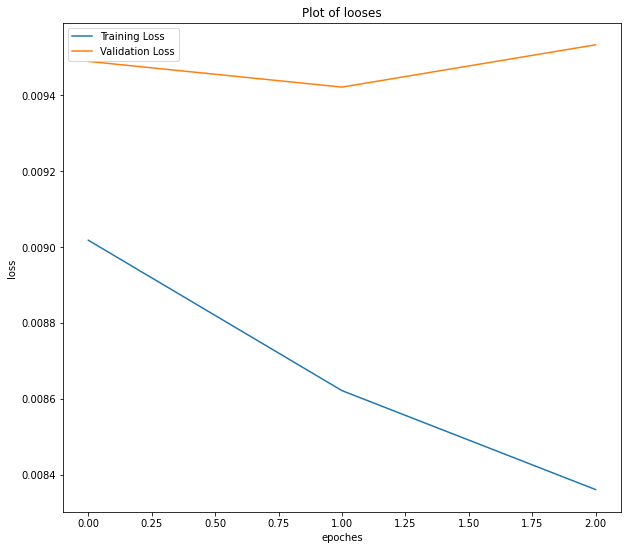

In [349]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoches')
plt.ylabel('loss')
plt.legend(['Training Loss','Validation Loss'])
plt.title('Plot of looses')
plt.show()

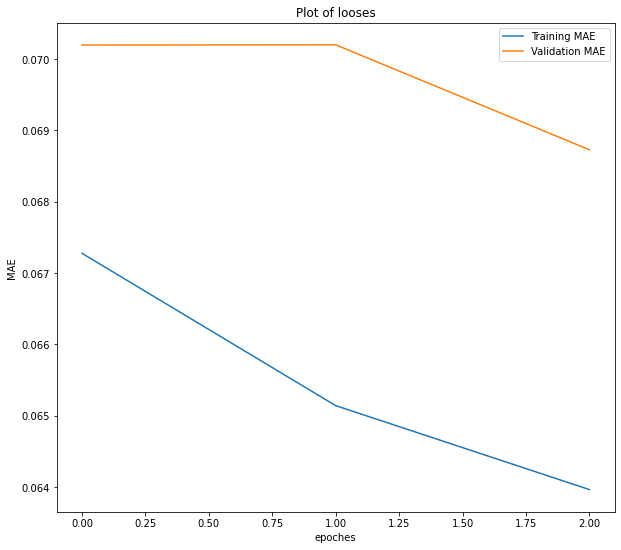

In [350]:
import matplotlib.pyplot as plt
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.xlabel('epoches')
plt.ylabel('MAE')
plt.legend(['Training MAE','Validation MAE'])
plt.title('Plot of looses')
plt.show()